In [59]:
from fastai.vision import *
from pathlib import Path
from operator import attrgetter

PATH = Path('path')
#paths = [PATH/'to/train/file1.jpg', PATH/'to/train/file2.jpg', PATH/'to/train/file3.jpg']
paths = list((PATH/'to/train').iterdir())
ids = list(map(attrgetter('stem'), paths))

bboxes = [
    [[[32, 1, 4, 5], [89, 5, 37, 5]], ['Footwear', 'Person']],
    [[[32, 2, 14, 35]], ['Table']],
    [[[2, 132, 41, 51], [9, 25, 39, 3]], ['Cup', 'Plate']],
    [[[32, 1, 4, 5], [89, 5, 37, 5]], ['Footwear', 'Person']],
    [[[32, 2, 14, 35]], ['Table']],
    [[[2, 132, 41, 51], [9, 25, 39, 3]], ['Cup', 'Plate']],
    [[[32, 1, 4, 5], [89, 5, 37, 5]], ['Footwear', 'Person']],
    [[[32, 1, 4, 5], [89, 5, 37, 5]], ['Footwear', 'Person']],
    [[[32, 2, 14, 35]], ['Table']],
    [[[2, 132, 41, 51], [9, 25, 39, 3]], ['Cup', 'Plate']],
]

img2bbox = dict(zip(ids, bboxes))
img2bbox.keys()

get_y_func = lambda o: img2bbox[Path(o).stem]

df = pd.DataFrame({"Path": ['to/train/file' + str(i+1) + '.jpg' for i in range(10)],
                   "ID": [item.stem for item in paths]}, columns=["Path", "ID"])

def get_data(bs, size):
    src = ObjectItemList.from_df(df, path=PATH)
    src = src.use_partial_data(0.9)
    src = src.split_by_rand_pct(0.3)
    src = src.label_from_func(get_y_func)
    src = src.transform(get_transforms(), size=128, tfm_y=True)
    src = src.databunch(path=PATH, bs=1, collate_fn=bb_pad_collate)
    src = src.normalize(imagenet_stats)
    return src

data = get_data(bs=1, size=128)

/home/ubuntu/anaconda3/envs/pytorch_p36/lib/python3.6/site-packages/fastai/data_block.py:451: UserWarning: Your training set is empty. If this is by design, pass `ignore_empty=True` to remove this warning.
  warn("Your training set is empty. If this is by design, pass `ignore_empty=True` to remove this warning.")
/home/ubuntu/anaconda3/envs/pytorch_p36/lib/python3.6/site-packages/fastai/data_block.py:454: UserWarning: Your validation set is empty. If this is by design, use `split_none()`
                 or pass `ignore_empty=True` when labelling to remove this warning.
  or pass `ignore_empty=True` when labelling to remove this warning.""")


In [60]:
data

ImageDataBunch;

Train: LabelList (0 items)
x: ObjectItemList

y: ObjectCategoryList

Path: path;

Valid: LabelList (0 items)
x: ObjectItemList

y: ObjectCategoryList

Path: path;

Test: None

In [43]:
data.__dict__

{'dl_tfms': [],
 'device': device(type='cuda'),
 'train_dl': DeviceDataLoader(dl=<torch.utils.data.dataloader.DataLoader object at 0x7fa782ace0f0>, device=device(type='cuda'), tfms=[functools.partial(<function _normalize_batch at 0x7fa78311ef28>, mean=tensor([0.4850, 0.4560, 0.4060]), std=tensor([0.2290, 0.2240, 0.2250]), do_x=True, do_y=False)], collate_fn=<function bb_pad_collate at 0x7fa78311ed08>),
 'valid_dl': DeviceDataLoader(dl=<torch.utils.data.dataloader.DataLoader object at 0x7fa782ace160>, device=device(type='cuda'), tfms=[functools.partial(<function _normalize_batch at 0x7fa78311ef28>, mean=tensor([0.4850, 0.4560, 0.4060]), std=tensor([0.2290, 0.2240, 0.2250]), do_x=True, do_y=False)], collate_fn=<function bb_pad_collate at 0x7fa78311ed08>),
 'fix_dl': DeviceDataLoader(dl=<torch.utils.data.dataloader.DataLoader object at 0x7fa782ace128>, device=device(type='cuda'), tfms=[functools.partial(<function _normalize_batch at 0x7fa78311ef28>, mean=tensor([0.4850, 0.4560, 0.4060]), 

In [50]:
data.valid_dl.y.__getitem__(2)

ImageBBox (1024, 768)

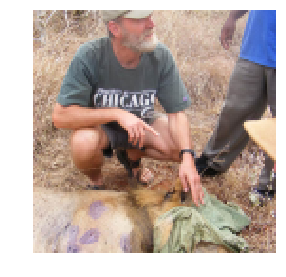

In [39]:
data.show_batch(rows=1)